# Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like:

- the `Rating` of the company given by the employee,
- the `Company Name`,
- the `Job Title` of the employee,
- the employee `Salary` (in Indian Rupee ₹),
- the number of `Salaries Reported`,
- the `Location` of the company,
- the `Employment Status` and
- the category of the `Job Roles`

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition.

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type.

In [4]:
import pandas as pd
import seaborn as sns
import os

In [6]:
excel_file = 'Software_Professionals_Salary.xlsx'
sps = pd.read_excel(excel_file)


In [7]:
sps.info() #tutte hanno il type corretto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


1. What is the shape (rows, cols) of the `sps` DataFrame?

In [10]:
sps.shape

(22770, 8)

2. How many unique `Job Roles` are there in the dataset?

In [8]:
unique_roles = sps['Job Roles'].nunique()
print(unique_roles)


11


3. How many unique `Job Title` are there for the "Python" `Job Role`?

In [9]:
unique_title = sps["Job Title"][sps['Job Roles'] == "Python"]
print(unique_title.nunique())

102


4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [11]:
a = sps['Company Name'][sps['Job Roles'] == "Python"][sps["Job Title"].str.contains("Analyst")]
print(a.nunique())
print(a.unique())

3
['Ocwen Financial' 'TrioHats Consulting' 'Infosys']


5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [12]:
GB = sps.groupby('Company Name')['Job Title','Salaries Reported'].sum()
GB.sort_values(by=['Salaries Reported'], ascending=False)
#Amazon

<ipython-input-12-06968dc19701>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  GB = sps.groupby('Company Name')['Job Title','Salaries Reported'].sum()
<ipython-input-12-06968dc19701>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GB = sps.groupby('Company Name')['Job Title','Salaries Reported'].sum()


,Salaries Reported
Company Name,
Amazon,2636
Infosys,2032
Tata Consultancy Services,1286
Accenture,894
Wipro,651
...,...
IndiaTechSoft,1
IndiaProperty,1
IndiaNivesh,1


**6**. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in?

In [13]:
loc = sps[sps['Company Name']== "Amazon"]["Location"]
print(loc.nunique())
print(loc.unique())

9
['Bangalore' 'Hyderabad' 'New Delhi' 'Chennai' 'Jaipur' 'Kolkata'
 'Madhya Pradesh' 'Mumbai' 'Pune']


7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [20]:
import requests
import numpy as np
url = 'https://open.er-api.com/v6/latest/USD'
r = requests.get(url)

In [21]:
r.json()['rates']['INR']
#conversion rate USD_INR

81.937492

In [ ]:
sps.insert(4, 'Salary USD', round(sps['Salary']/r.json()['rates']['INR']))
#creato tabella con la formula all'interno

8. What is the average `Salary USD` for the "Python" `Job Role`?

In [26]:
salary = sps['Salary USD'][sps['Job Roles'] == "Python"]
print(salary.mean())

5931.659978880676


9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s?

In [ ]:
g = sps.groupby('Company Name')['Job Title','Salary USD'].mean()
g.sort_values(by=['Salary USD'], ascending = False)
#Thapar University

10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

<ipython-input-168-54943cf7a808>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_data = sps.groupby('Company Name').mean()


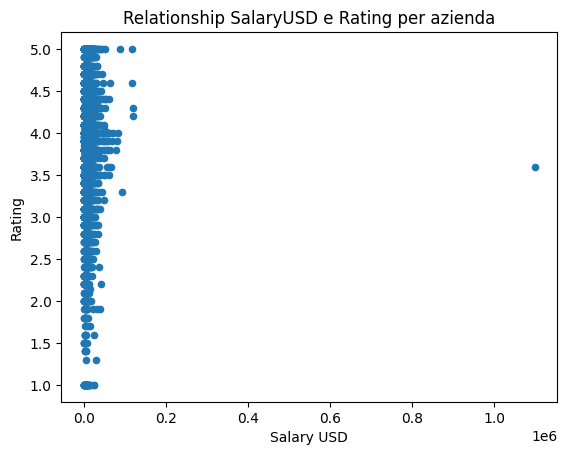

In [168]:
average_data = sps.groupby('Company Name').mean()

average_data.plot.scatter(x='Salary USD', y='Rating')
plt.title('Relationship SalaryUSD e Rating per azienda')
plt.xlabel('Salary USD')
plt.ylabel('Rating')

plt.show()
# L'anomalia è la Thapar University che abbiamo visto prima
